## Задание

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в конкретном регионе от времени,
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
    в) количество отказов компьютера,
    
    г) число обращений в поликлинику по району,
    
    д) координаты автобуса при движении по маршруту,
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

import os
#print(os.listdir())

## 1.

__Ответ:__
а, б , г (наверняка есть временная метка)


## 2.

In [2]:
df = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
df.head(10)

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0
2005-12-31 06:00:00,1372.0
2005-12-31 07:00:00,1402.0
2005-12-31 08:00:00,1425.0
2005-12-31 09:00:00,1502.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [5]:
df.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


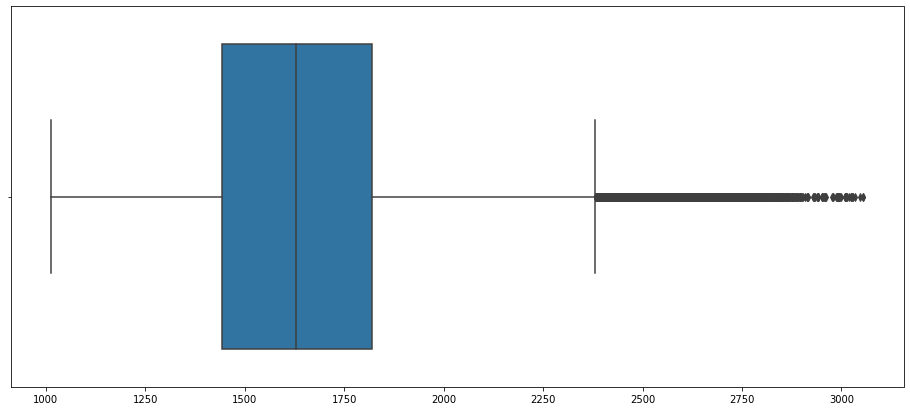

In [6]:
plt.rcParams["figure.figsize"] = (16,7)
sns.boxplot(df.values)
plt.show()

In [7]:
# проверим пропуски
df['DUQ_MW'].isnull().sum()

0

Видим , что пропуски отсутсвуют

Text(0, 0.5, 'МВт')

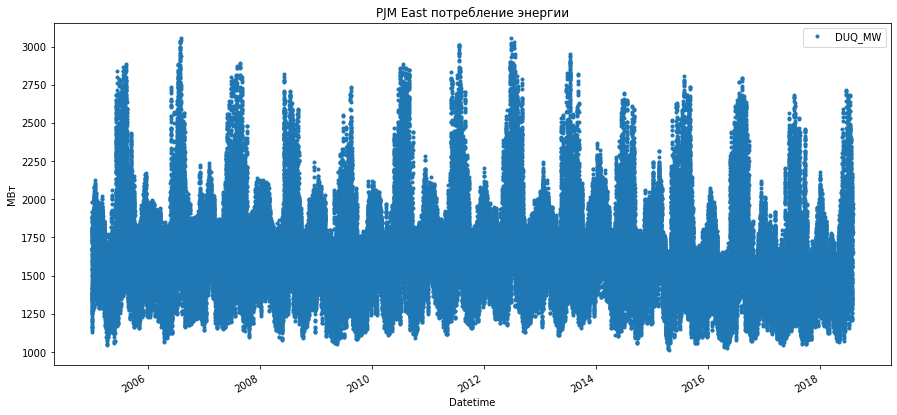

In [8]:
df.plot( style = '.', figsize = ( 15, 7 ), title = 'PJM East потребление энергии' )
plt.ylabel ( 'МВт' )

На графике четко видно сезонное потребление энергии

Text(0, 0.5, 'МВт')

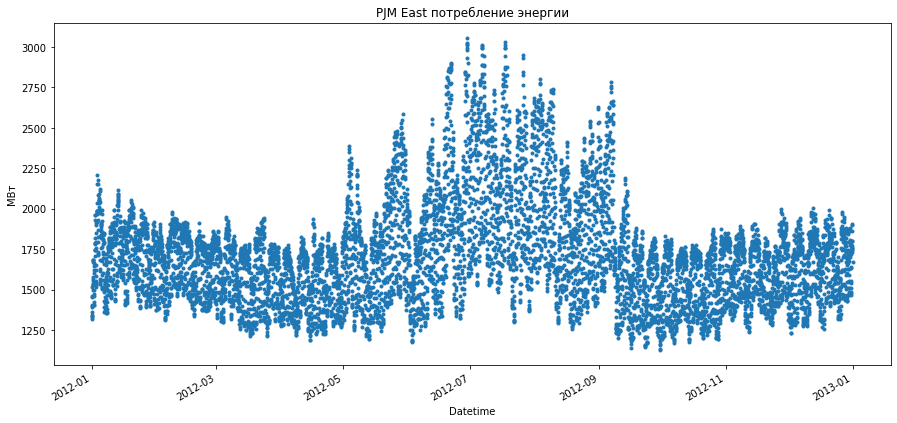

In [9]:
df['date'] = df.index
df_2012 = df.loc[df['date'].dt.year == 2012]['DUQ_MW']
df_2012.plot( style = '.', figsize = ( 15, 7 ), title = 'PJM East потребление энергии' )
plt.ylabel ( 'МВт' )

Энергопотребление растет с мая по сентябрь.
Внутри года можем наблюдать циклическое распределение потребление энергии внутни недели

## 3.

In [10]:
brent_df = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_df.head(10)

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59
2019-08-26,58.26
2019-08-25,57.81
2019-08-23,58.94
2019-08-22,60.05


In [11]:
brent_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  2667 non-null   float64
dtypes: float64(1)
memory usage: 41.7 KB


In [12]:
brent_df.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


In [13]:
brent_df[brent_df['Значение'].isnull()].count()

Значение    0
dtype: int64

Text(0.5, 0, 't')

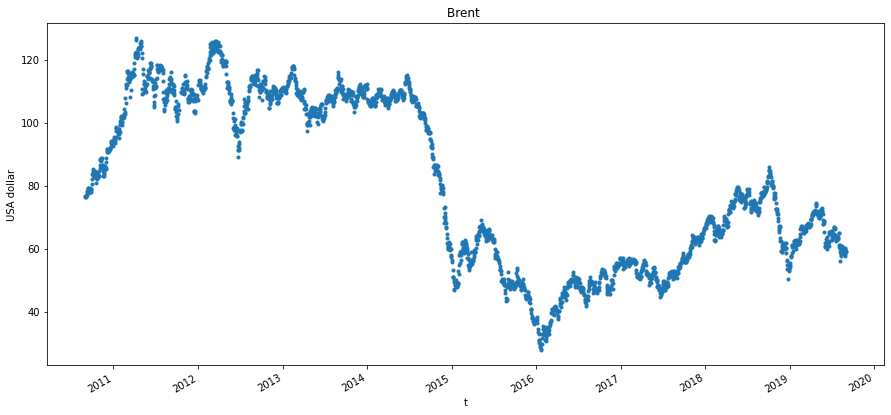

In [14]:
_ = brent_df['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [15]:
brent_df['date'] = brent_df.index
brent_df['year'] = brent_df['date'].dt.year
brent_df['month'] = brent_df['date'].dt.month
brent_df['week'] = brent_df['date'].dt.weekofyear

In [16]:
brent_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Значение  2667 non-null   float64       
 1   date      2667 non-null   datetime64[ns]
 2   year      2667 non-null   int64         
 3   month     2667 non-null   int64         
 4   week      2667 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 125.0 KB


In [17]:
brent_df.tail()

,Значение,date,year,month,week
Дата,,,,,
2010-09-05,76.63,2010-09-05,2010,9,35
2010-09-04,76.62,2010-09-04,2010,9,35
2010-09-03,76.57,2010-09-03,2010,9,35
2010-09-02,76.89,2010-09-02,2010,9,35
2010-09-01,76.37,2010-09-01,2010,9,35


In [18]:
data_i=pd.MultiIndex.from_arrays([brent_df.index.year, brent_df.index.month, brent_df.index.date
                                 ], names=['yearGroup','monthGroup','dateGroup'])
brent_df.index = data_i
brent_df.head()

Значение       date  year  month  week
yearGroup monthGroup dateGroup                                         
2019      9          2019-09-01     58.84 2019-09-01  2019      9    35
          8          2019-08-30     59.19 2019-08-30  2019      8    35
                     2019-08-29     60.37 2019-08-29  2019      8    35
                     2019-08-28     59.84 2019-08-28  2019      8    35
                     2019-08-27     59.59 2019-08-27  2019      8    35

## 4.

In [19]:
yearGroup = brent_df.groupby('year').agg({'Значение': ['mean', 'std']}).round(2)
yearGroup.columns = ["_".join(x) for x in yearGroup.columns.ravel()]
yearGroup = yearGroup.rename(columns={"Значение_mean": "ValForYear", "Значение_std": "ValStdForYear"}, errors="raise")
yearGroup

,ValForYear,ValStdForYear
year,,
2010,84.96,5.27
2011,110.76,7.02
2012,111.38,7.78
2013,108.14,4.01
2014,99.44,14.51
2015,53.97,7.93
2016,45.35,6.80
2017,54.72,4.88
2018,71.65,6.87


In [20]:
monthGroup = brent_df.groupby(['year','month']).agg({'Значение': ['mean', 'std']}).round(2)
monthGroup.columns = ["_".join(x) for x in monthGroup.columns.ravel()]
monthGroup = monthGroup.rename(columns={"Значение_mean": "ValForMonth", "Значение_std": "ValStdForMonth"}, errors="raise")
monthGroup

ValForMonth  ValStdForMonth
year month                             
2010 9            78.23            1.29
     10           83.47            0.90
     11           86.18            1.75
     12           92.23            1.44
2011 1            97.03            1.84
...                 ...             ...
2019 5            69.97            2.39
     6            62.98            1.87
     7            64.29            1.37
     8            59.26            1.19
     9            58.84             NaN

[109 rows x 2 columns]

In [21]:
weekofyearGroup = brent_df.groupby(['year','month','week']).agg({'Значение': ['mean', 'std']}).round(2)
weekofyearGroup.columns = ["_".join(x) for x in weekofyearGroup.columns.ravel()]
weekofyearGroup = weekofyearGroup.rename(columns={"Значение_mean": "ValForWeek", "Значение_std": "ValStdForWeek"}, errors="raise")
weekofyearGroup

ValForWeek  ValStdForWeek
year month week                           
2010 9     35         76.62           0.19
           36         77.67           0.65
           37         78.69           0.54
           38         78.52           0.60
           39         79.94           1.80
...                     ...            ...
2019 8     32         58.24           1.21
           33         59.03           0.95
           34         59.50           0.96
           35         59.45           0.79
     9     35         58.84            NaN

[555 rows x 2 columns]

In [22]:
df2 = pd.merge(brent_df, yearGroup, on='year', suffixes=('', '_'))
# df2 = df2.rename(columns={"Значение_": "ValForYear"}, errors="raise")
df2 = pd.merge(df2, monthGroup, on=['year','month'], suffixes=('', '_'))
# df2 = df2.rename(columns={"Значение_": "ValForMonth"}, errors="raise")
df2 = pd.merge(df2, weekofyearGroup, on=['year','month','week'], suffixes=('', '_'))
# df2 = df2.rename(columns={"Значение_": "ValForWeek"}, errors="raise")
df2

,Значение,date,year,month,week,ValForYear,ValStdForYear,ValForMonth,ValStdForMonth,ValForWeek,ValStdForWeek
0,58.84,2019-09-01,2019,9,35,64.92,4.41,58.84,NaN,58.84,NaN
1,59.19,2019-08-30,2019,8,35,64.92,4.41,59.26,1.19,59.45,0.79
2,60.37,2019-08-29,2019,8,35,64.92,4.41,59.26,1.19,59.45,0.79
3,59.84,2019-08-28,2019,8,35,64.92,4.41,59.26,1.19,59.45,0.79
4,59.59,2019-08-27,2019,8,35,64.92,4.41,59.26,1.19,59.45,0.79
...,...,...,...,...,...,...,...,...,...,...,...
2662,76.63,2010-09-05,2010,9,35,84.96,5.27,78.23,1.29,76.62,0.19
2663,76.62,2010-09-04,2010,9,35,84.96,5.27,78.23,1.29,76.62,0.19
2664,76.57,2010-09-03,2010,9,35,84.96,5.27,78.23,1.29,76.62,0.19
2665,76.89,2010-09-02,2010,9,35,84.96,5.27,78.23,1.29,76.62,0.19


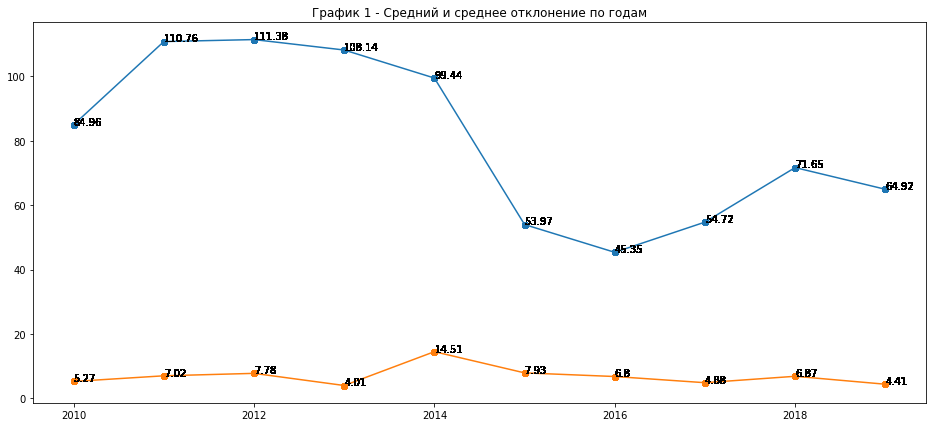

In [23]:
plt.rcParams["figure.figsize"] = (16,7) 
plt.plot(df2['year'], df2['ValForYear'], marker='o')
plt.plot(df2['year'], df2['ValStdForYear'], marker='o')
plt.title('График 1 - Средний и среднее отклонение по годам')
ax = plt.gca()
df2.apply(lambda x: ax.annotate(x['ValForYear'], (x['year'], x['ValForYear'])), axis=1)
ax2 = plt.gca()
df2.apply(lambda x: ax2.annotate(x['ValStdForYear'], (x['year'], x['ValStdForYear'])), axis=1)
plt.show()

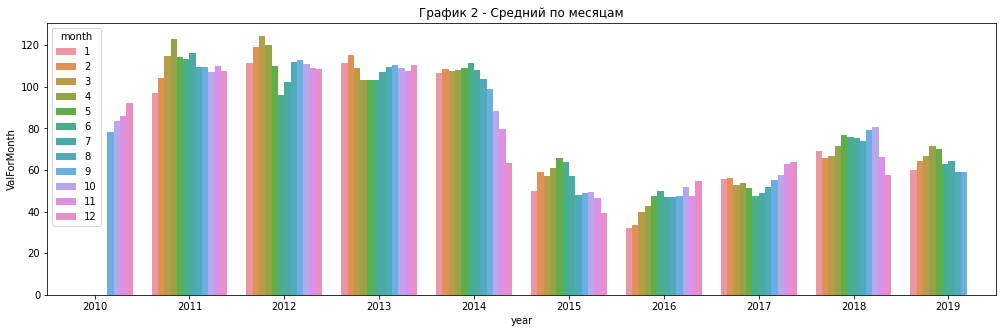

In [24]:
plt.rcParams["figure.figsize"] = (17,5)
plt.title('График 2 - Средний по месяцам')
sns.barplot(x='year', y='ValForMonth', hue='month', data=df2)
plt.show()

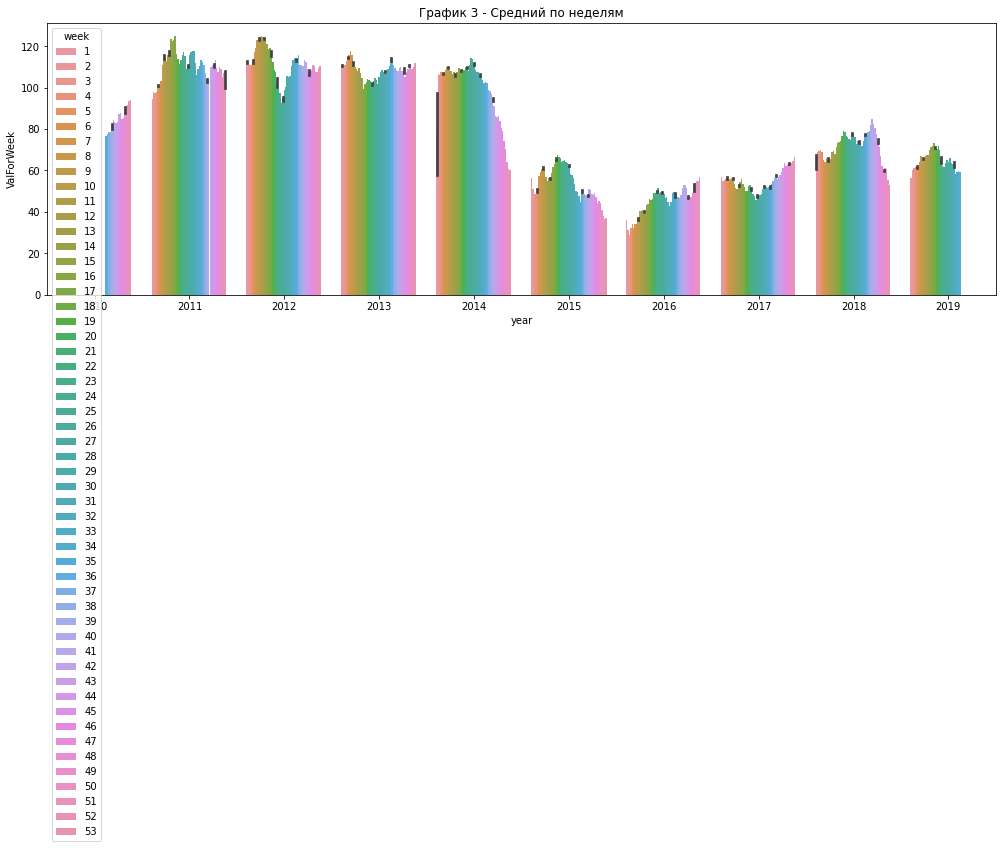

In [25]:
sns.barplot(x='year', y='ValForWeek', hue='week', data=df2)
plt.title('График 3 - Средний по неделям')
plt.show()

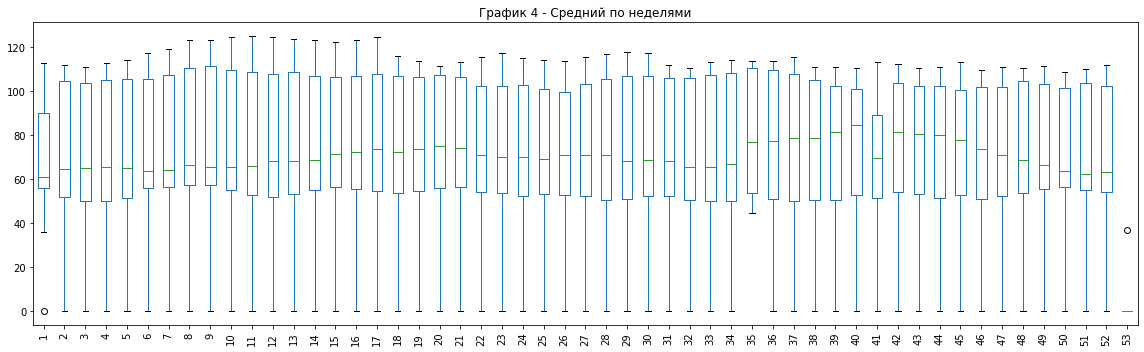

In [26]:
(df2.pivot_table(columns='week', index='year', 
                values='ValForWeek', aggfunc='mean', fill_value=0
               ).plot.box(rot=90, figsize=(16,5)))

plt.title('График 4 - Средний по неделями')
plt.tight_layout()

 - __1.__ Видно, что первая неделя года значенуется падением цены и это понятно , так как биржы всегда стараются закрыться на низком показателе
 - __2.__ В первой четверти октября тоже проиходит падение и это уже интересно так как цикличность))

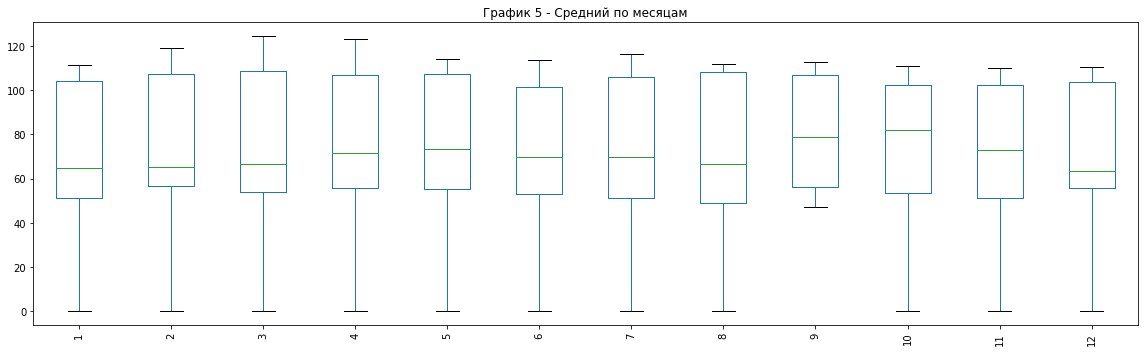

In [27]:
(df2.pivot_table(columns='month', index='year', 
                values='ValForWeek', aggfunc='mean', fill_value=0
               ).plot.box(rot=90, figsize=(16,5)))

plt.title('График 5 - Средний по месяцам')
plt.tight_layout()

## 5.

Изменений (аналитики) цены оносительно даты, месяца или года нет.
В последних графиках 4 и 5 видно что средння цена остается в едином диапазоне, выбросов нет , 
медиана скорее всего показывает отклонения по неведомым факторам))